# 1. Introduction and Business Problem

#### An insurance company is extending the number of their tied agencies. They are looking for an appropriate location for a new agency in Zurich, Switzerland. Following criteria is important: 

1. Proximity to the public transportation. People in Switzerland are very environmentally conscious, a majority of them prefer traveling by train or bus, therefore it is very important, that the agency is easy to reach.
2. Proximity to shopping malls or nice coffee/food places. Swiss people don't buy much insurance products online, they still rely a lot on a personal advice and make use of the appointment in an agency extensively. In addition, buying an insurance is a rather boring, tedious topic. People try to solve it on the go, between other activities. So to be successful, the agency shall be located appropriately, close to stores and food places. 

# 2. Data used

I will be using 
1) GeoJSON data for Zurich, published by the City of Zurich for the free use:
https://www.stadt-zuerich.ch/geodaten/download/Statistische_Quartiere

This data provides a granular information about the neighborhoods of the City of Zurich. I will be using it to get the initial selection list of the neighbourhoods (see screenshot below).

2) Foursquare location data, provided via Foursquare API. I will leverage this data to explore the venues in the neighbourhoods of Zurich and determine, which neighbourhoods fulfil the criteria listed above. Based on this, I will make a final suggestion for the best location(s).

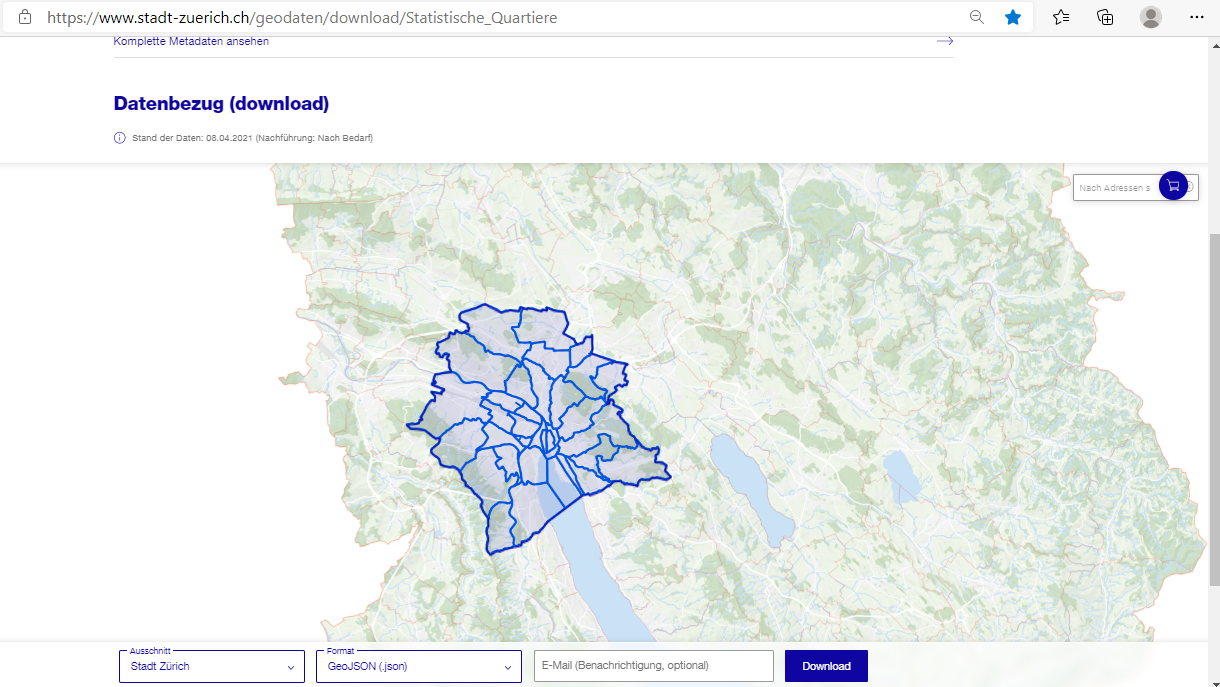